# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [364]:
# Add Matplotlib inline magic command
%%
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

UsageError: Line magic function `%%` not found.


### Merge the DataFrames

In [365]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [366]:
#  1. Get the total rides for each city type
t_rides = pyber_data_df.groupby(['type']).ride_id.count()

In [367]:
# 2. Get the total drivers for each city type
t_drivers = city_data_df.groupby(['type']).driver_count.sum()


In [368]:
#  3. Get the total amount of fares for each city type
t_fares = pyber_data_df.groupby(['type']).fare.sum()


In [369]:
#  4. Get the average fare per ride for each city type. 
fare_by_rides = t_fares / t_rides


In [370]:
# 5. Get the average fare per driver for each city type. 
fare_by_drivers = t_fares / t_drivers


In [371]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({'Total Rides': t_rides, 'Total Drivers': t_drivers, 'Total Fares': t_fares, 'Average Fare Per Ride': fare_by_rides, 'Average Fare Per Driver': fare_by_drivers})

In [372]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [373]:
#  8. Format the columns.
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map('{:,}'.format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map('{:,}'.format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare Per Ride'] = pyber_summary_df['Average Fare Per Ride'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare Per Driver'] = pyber_summary_df['Average Fare Per Driver'].map('${:,.2f}'.format)


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [374]:
# 1. Read the merged DataFrame
df = pyber_data_df

In [375]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
df = df.groupby(['type','date']).fare.sum()


In [376]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
df = df.reset_index()


In [377]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_table = df.pivot(index='date',columns='type', values='fare')

In [378]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
new_df = pivot_table.loc['2019-01-01':'2019-04-29']


In [379]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
new_df.index = pd.to_datetime(new_df.index)

In [380]:
# 7. Check that the datatype for the index is datetime using df.info()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [381]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
week_sums = new_df.resample('W').sum()

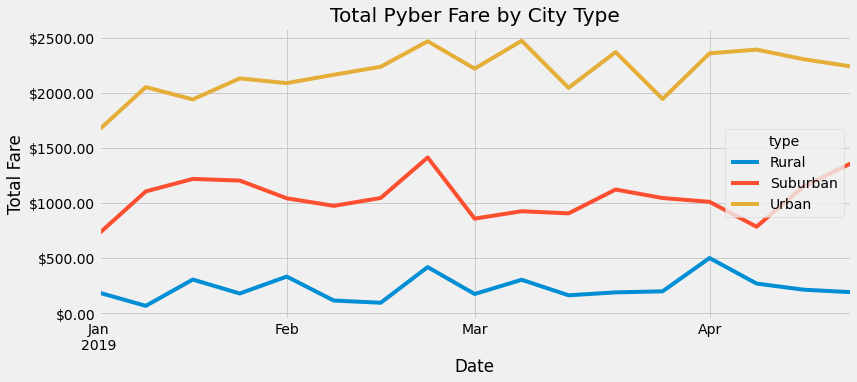

In [383]:
# Import the style from Matplotlib.
from matplotlib import style
import matplotlib.dates as mdates
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
week_sums.plot(ax=ax)
ax.set_ylabel('Total Fare')
ax.yaxis.set_major_formatter('${x:1.2f}')
ax.set_xlabel('Date')
ax.set_title('Total Pyber Fare by City Type')

plt.savefig('analysis/PyBer_fare_summary.png')
plt.show()

